# Benford's Law

### Assignment: Observing Benford's Law with Newspaper Data

#### Objective

To collect numbers from the front page of a newspaper, analyze the distribution of their leading digits, and compare the observed distribution to the expected distribution according to Benford's Law.

### Steps

1. **Choose a Source**:
   - Select a recent newspaper (print or online) that includes a variety of numbers on its front page. Ideally, choose a paper that covers a range of topics such as finance, demographics, and science.

2. **Collect Data**:
   - Gather at least 100 numbers from the front page. Ensure that the numbers are varied and span different orders of magnitude. Include numbers related to:
     - Financial data (e.g., stock prices, GDP figures, company revenues)
     - Demographic data (e.g., population counts, statistics)
     - Scientific data (e.g., measurements, distances, areas)

3. **Extract Leading Digits**:
   - Extract the first digit of each number in your dataset. Ensure the data is in numeric form and discard any non-numeric entries.

4. **Calculate Observed Distribution**:
   - Count the frequency of each leading digit (1 through 9).
   - Calculate the relative frequency by dividing the count of each digit by the total number of data points.

5. **Compare with Benford's Law**:
   - Calculate the expected frequency of each digit using Benford's Law:
     $$
     P(d) = \log_{10}\left(1 + \frac{1}{d}\right)
     $$
   - Compare the observed distribution to the expected distribution.

6. **Visualize the Results**:
   - Create a bar chart showing the observed frequencies and the expected frequencies according to Benford's Law.

7. **Analyze and Conclude**:
   - Discuss whether the numbers from the newspaper follow Benford's Law.
   - Explain any deviations and consider factors that might influence the distribution.

### Example Analysis

#### Choosing and Collecting Data

Select a diverse newspaper front page with a variety of numbers. For example, you might find:
- Financial figures such as stock prices and company earnings.
- Population statistics from demographic reports.
- Scientific measurements like distances or quantities.

#### Extracting Leading Digits

After gathering your numbers, extract the first digit of each:
- If the number is 1,234, the leading digit is 1.
- If the number is 78.9, the leading digit is 7.

#### Calculating and Comparing Distributions

Count the frequency of each leading digit and compare it to the theoretical distribution predicted by Benford's Law. Benford's Law predicts:
- 1 appears as the leading digit about 30% of the time.
- 2 appears about 17.6% of the time.
- The frequency decreases logarithmically for higher digits.

### Why It Works

Benford's Law works because many real-world datasets involve numbers that span multiple orders of magnitude and often result from multiplicative processes. These processes include growth rates, financial transactions, and natural measurements. 

### Review

By following these steps, you can observe Benford's Law in action with real-world data from the front page of a newspaper. This exercise demonstrates the law's applicability to naturally occurring datasets and helps you understand the underlying principles of logarithmic distribution and multiplicative processes.

# Benford's Law and Multiplicative Processes

#### Multiplicative Processes Explained

Multiplicative processes are fundamental to why Benford's Law appears in many natural datasets. These processes involve quantities that grow or shrink by a constant percentage rather than by a fixed amount. Here’s a deeper look:

1. **Exponential Growth and Decay**:
   - **Financial Growth**: Suppose you have a bank account that grows by 5% annually. The amount $A(t)$ in the account grows multiplicatively:
     $$
     A(t) = A_0 \times (1 + r)^t
     $$
     where $A_0$ is the initial amount, $r$ is the interest rate, and $t$ is time.
   - **Population Growth**: Populations often grow at a constant percentage rate, leading to exponential growth:
     $$
     P(t) = P_0 \times e^{rt}
     $$
     where $P_0$ is the initial population, $r$ is the growth rate, and $t$ is time.
   - **Radioactive Decay**: The amount of a radioactive substance decreases exponentially over time:
     $$
     N(t) = N_0 \times e^{-\lambda t}
     $$
     where $N_0$ is the initial quantity, $\lambda$ is the decay constant, and $t$ is time.

2. **Logarithmic Transformation**:
   - When you take the logarithm of numbers resulting from multiplicative processes, their logarithms tend to be uniformly distributed. This uniform distribution of logarithms results in the non-uniform distribution of leading digits predicted by Benford's Law.

#### Why We See Benford's Law Everywhere

1. **Wide Range of Magnitudes**:
   - Real-world datasets often span several orders of magnitude. For instance, financial transactions can range from a few cents to millions of dollars, and scientific measurements can span from nanometers to kilometers.

2. **Logarithmic Scale**:
   - On a logarithmic scale, the interval for the digit 1 is larger than for higher digits. For example, numbers starting with 1 occupy the interval from $ \log_{10}(1) = 0 $ to $ \log_{10}(2) \approx 0.301 $, while numbers starting with 9 occupy the interval from $ \log_{10}(9) \approx 0.954 $ to $ \log_{10}(10) = 1 $.

### Mathematical Explanation

The probability $ P(d) $ that a number starts with digit $ d $ is given by:
$$
P(d) = \log_{10}\left(1 + \frac{1}{d}\right)
$$
This can be understood by considering the intervals on a logarithmic scale.

For example:
- For a number to start with 1:
  $$
  1 \leq x < 2 \quad \text{(linear scale)}
  $$
  $$
  0 \leq \log_{10}(x) < \log_{10}(2) \approx 0.301 \quad \text{(logarithmic scale)}
  $$
- For a number to start with 2:
  $$
  2 \leq x < 3
  $$
  $$
  \log_{10}(2) \approx 0.301 \leq \log_{10}(x) < \log_{10}(3) \approx 0.477
  $$

The length of the interval for digit 1 is larger than for digit 2, which is larger than for digit 3, and so on, leading to a higher probability of 1 being the first digit.

### Visualizing Benford's Law with Code

To visualize this, we can generate data that spans multiple orders of magnitude and plot the distribution of the first digits against the expected distribution according to Benford's Law.

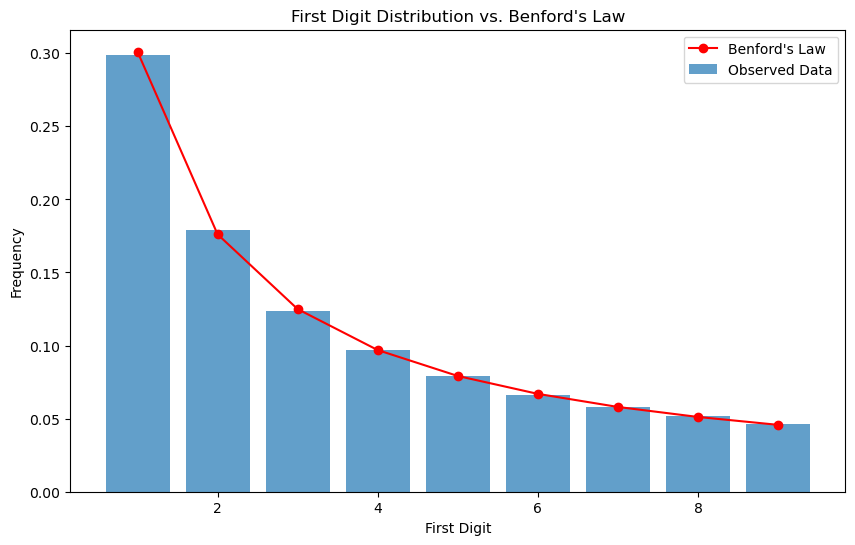

In [117]:
import numpy as np
import matplotlib.pyplot as plt

def benford_distribution(digit):
    '''Calculate the Benford's Law probability for a given digit'''
    return np.log10(1 + 1 / digit)

def generate_exponential_data(size, min_exp, max_exp):
    '''Generate exponentially spaced data over several orders of magnitude'''
    exponents = np.random.uniform(min_exp, max_exp, size)
    data = np.power(10, exponents)
    first_digits = [int(str(num)[0]) for num in data]
    return first_digits

def plot_benford_law_with_observed(first_digits):
    '''Plot the distribution of first digits against Benford's Law'''
    counts = np.bincount(first_digits)[1:10]
    total_counts = sum(counts)
    frequencies = counts / total_counts
    
    benford_probabilities = [benford_distribution(d) for d in range(1, 10)]
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, 10), frequencies, alpha=0.7, label='Observed Data')
    plt.plot(range(1, 10), benford_probabilities, 'ro-', label='Benford\'s Law')
    plt.xlabel('First Digit')
    plt.ylabel('Frequency')
    plt.title('First Digit Distribution vs. Benford\'s Law')
    plt.legend()
    plt.grid(False)
    plt.show()

# Generate and plot data
sample_size = 100000
min_exp = 0
max_exp = 5
first_digits = generate_exponential_data(sample_size, min_exp, max_exp)
plot_benford_law_with_observed(first_digits)

### Explanation of the Code

1. **Function `benford_distribution`**: Calculates the expected probability for each digit according to Benford's Law.
2. **Function `generate_exponential_data`**: Generates data by sampling exponents uniformly over a specified range (from `min_exp` to `max_exp`) and then transforming these exponents back to the original scale using $10^{\text{exponent}}$. This simulates real-world data spanning multiple orders of magnitude.
3. **Function `plot_benford_law_with_observed`**: Plots the observed distribution of first digits and compares it to the expected distribution according to Benford's Law.

### Summary

By generating data that spans multiple orders of magnitude and visualizing the leading digit distribution, we can observe that the data follows Benford's Law. This helps demonstrate why Benford's Law applies to datasets that span multiple orders of magnitude and arise from real-world, multiplicative processes. This law doesn't apply to datasets with numbers confined to a small range or generated uniformly within a small interval.

# Examples of Benford's Law

### Example 1: Financial Data from Yahoo Finance

You can use financial data such as stock prices, which often follow Benford's Law.

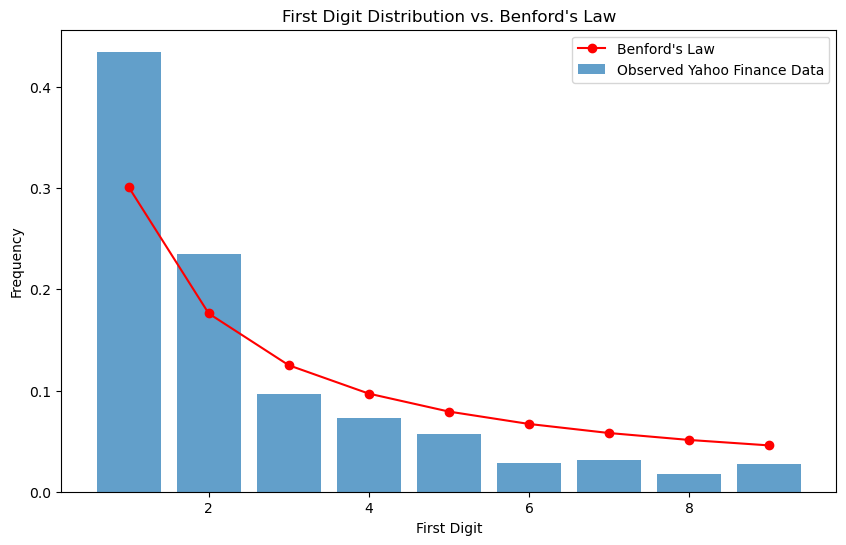

In [118]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

def fetch_stock_data(tickers):
    all_data = []
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        hist = stock.history(period="max")  # Fetch maximum historical data
        closing_prices = hist['Close'].dropna().tolist()
        all_data.extend(closing_prices)
    return all_data

def benford_distribution(digit):
    '''Calculate the Benford's Law probability for a given digit'''
    return np.log10(1 + 1 / digit)

def plot_benford_law_with_observed(first_digits):
    '''Plot the distribution of first digits against Benford's Law'''
    counts = np.zeros(10, dtype=int)
    observed_counts = np.bincount(first_digits)
    counts[:len(observed_counts)] = observed_counts
    
    total_counts = sum(counts[1:10])
    frequencies = counts[1:10] / total_counts
    
    benford_probabilities = [benford_distribution(d) for d in range(1, 10)]
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, 10), frequencies, alpha=0.7, label='Observed Yahoo Finance Data')
    plt.plot(range(1, 10), benford_probabilities, 'ro-', label='Benford\'s Law')
    plt.xlabel('First Digit')
    plt.ylabel('Frequency')
    plt.title('First Digit Distribution vs. Benford\'s Law')
    plt.legend()
    plt.grid(False)
    plt.show()

tickers = ['AAPL', 'MSFT', 'GOOG']  # Example tickers
all_data = fetch_stock_data(tickers)
first_digits = [int(str(price)[0]) for price in all_data if price > 0]

plot_benford_law_with_observed(first_digits)


### Example 2: Population Data from World Bank API

You can use population data from the World Bank API, which is publicly available and typically follows Benford's Law.

In [119]:
import requests
import json

def fetch_population_data():
    url = 'http://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?format=json&per_page=500'
    response = requests.get(url)
    data = response.json()
    populations = []
    
    for entry in data[1]:
        population = entry.get('value')
        if population:
            populations.append(population)
    
    return populations

populations = fetch_population_data()
first_digits = [int(str(pop)[0]) for pop in populations if pop > 0]

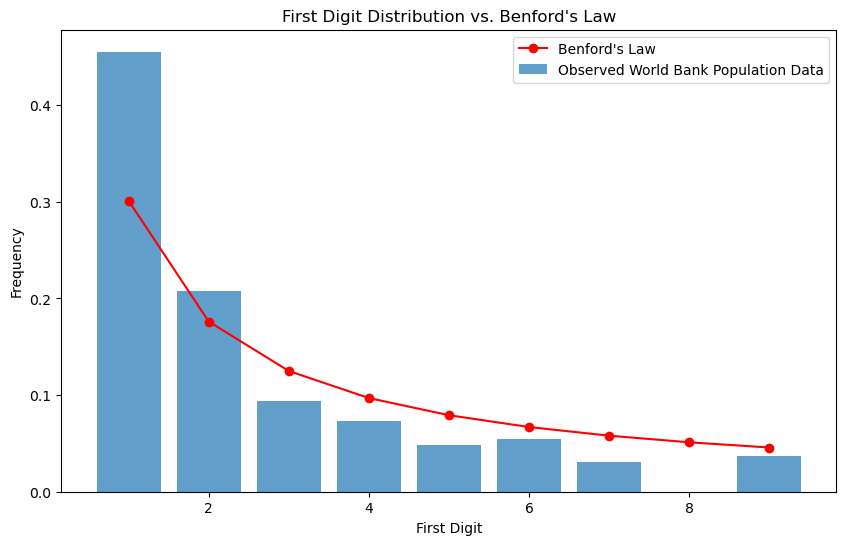

In [120]:
import matplotlib.pyplot as plt
import numpy as np

def benford_distribution(digit):
    '''Calculate the Benford's Law probability for a given digit'''
    return np.log10(1 + 1 / digit)

def plot_benford_law_with_observed(first_digits):
    '''Plot the distribution of first digits against Benford's Law'''
    counts = np.bincount(first_digits)[1:10]
    total_counts = sum(counts)
    frequencies = counts / total_counts
    
    benford_probabilities = [benford_distribution(d) for d in range(1, 10)]
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, 10), frequencies, alpha=0.7, label='Observed World Bank Population Data')
    plt.plot(range(1, 10), benford_probabilities, 'ro-', label='Benford\'s Law')
    plt.xlabel('First Digit')
    plt.ylabel('Frequency')
    plt.title('First Digit Distribution vs. Benford\'s Law')
    plt.legend()
    plt.grid(False)
    plt.show()

plot_benford_law_with_observed(first_digits)

### Example 3: Scientific Data from NASA

You can use astronomical data from NASA, which spans multiple orders of magnitude.

In [121]:
import requests

def fetch_neo_data(api_key):
    url = 'https://api.nasa.gov/neo/rest/v1/neo/browse'
    params = {
        'api_key': api_key,
        'size': 1000  # Fetch 1000 entries
    }
    response = requests.get(url, params=params)
    data = response.json()
    diameters = []
    
    for neo in data['near_earth_objects']:
        diameter = neo['estimated_diameter']['kilometers']['estimated_diameter_max']
        diameters.append(diameter)
    
    return diameters

# Use your NASA API key here
api_key = 'DEMO_KEY'
diameters = fetch_neo_data(api_key)
first_digits = [int(str(diameter)[0]) for diameter in diameters if diameter > 0]

# Now we have the first digits, we can proceed with the analysis


### Analyzing the Data

Once you have the data, you can analyze the distribution of the first digits and compare it to Benford's Law.

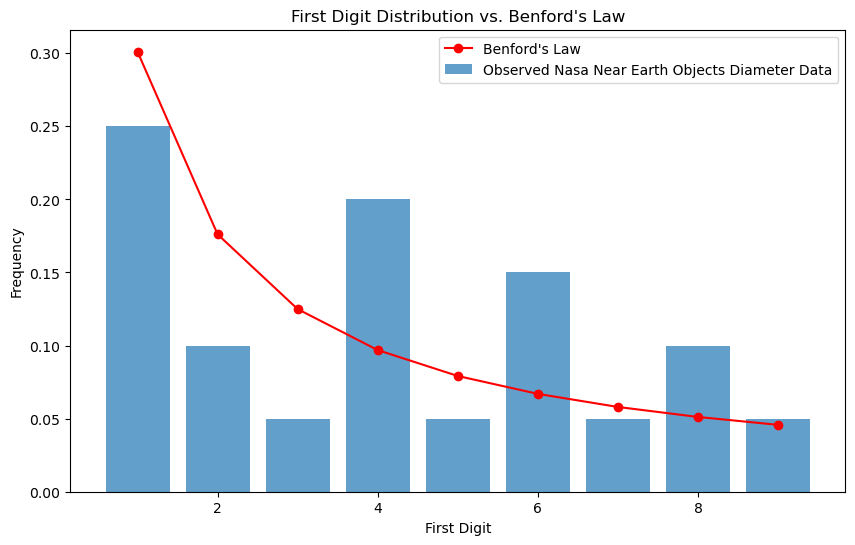

In [122]:
import matplotlib.pyplot as plt
import numpy as np

def benford_distribution(digit):
    '''Calculate the Benford's Law probability for a given digit'''
    return np.log10(1 + 1 / digit)

def plot_benford_law_with_observed(first_digits):
    '''Plot the distribution of first digits against Benford's Law'''
    counts = np.bincount(first_digits)[1:10]
    total_counts = sum(counts)
    frequencies = counts / total_counts
    
    benford_probabilities = [benford_distribution(d) for d in range(1, 10)]
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, 10), frequencies, alpha=0.7, label='Observed Nasa Near Earth Objects Diameter Data')
    plt.plot(range(1, 10), benford_probabilities, 'ro-', label='Benford\'s Law')
    plt.xlabel('First Digit')
    plt.ylabel('Frequency')
    plt.title('First Digit Distribution vs. Benford\'s Law')
    plt.legend()
    plt.grid(False)
    plt.show()

plot_benford_law_with_observed(first_digits)

### Confidence Intervals for Benford's Law

1. **Understanding the Concept**:
   - Benford's Law gives the expected probability for each digit. For digit $ d $, the probability $ P(d) $ is given by:
     $$
     P(d) = \log_{10}\left(1 + \frac{1}{d}\right)
     $$
   - A confidence interval provides a range around this expected probability where we would expect the observed frequencies to lie, given a certain level of confidence (e.g., 95%).

2. **Calculating Confidence Intervals**:
   - To calculate confidence intervals for the frequencies predicted by Benford's Law, you can use the normal approximation to the binomial distribution. The formula for the confidence interval for a proportion $ \hat{P}(d) $ is:
     $$
     \hat{P}(d) \pm Z \sqrt{\frac{\hat{P}(d)(1 - \hat{P}(d))}{n}}
     $$
     where:
     - $ \hat{P}(d) $ is the observed proportion of digit $ d $.
     - $ Z $ is the Z-score corresponding to the desired confidence level (e.g., 1.96 for 95% confidence).
     - $ n $ is the total number of observations.

3. **Deriving the Formula**:
   - The observed proportion $ \hat{P}(d) $ is calculated as $ \frac{x}{n} $, where $ x $ is the number of times digit $ d $ appears as the leading digit, and $ n $ is the total number of observations.
   - The standard error (SE) of the proportion is given by:
     $$
     \text{SE} = \sqrt{\frac{\hat{P}(d)(1 - \hat{P}(d))}{n}}
     $$
   - The margin of error (MOE) is then $ Z $ times the standard error:
     $$
     \text{MOE} = Z \times \text{SE}
     $$
   - The confidence interval is constructed by adding and subtracting the margin of error from the observed proportion:
     $$
     \hat{P}(d) \pm \text{MOE}
     $$

4. **Applying the Formula**:
   - For each digit $ d $, calculate the expected frequency $ P(d) $.
   - Use the observed count of the digit $ d $ to calculate $ \hat{P}(d) $.
   - Apply the formula to find the confidence interval for each digit.

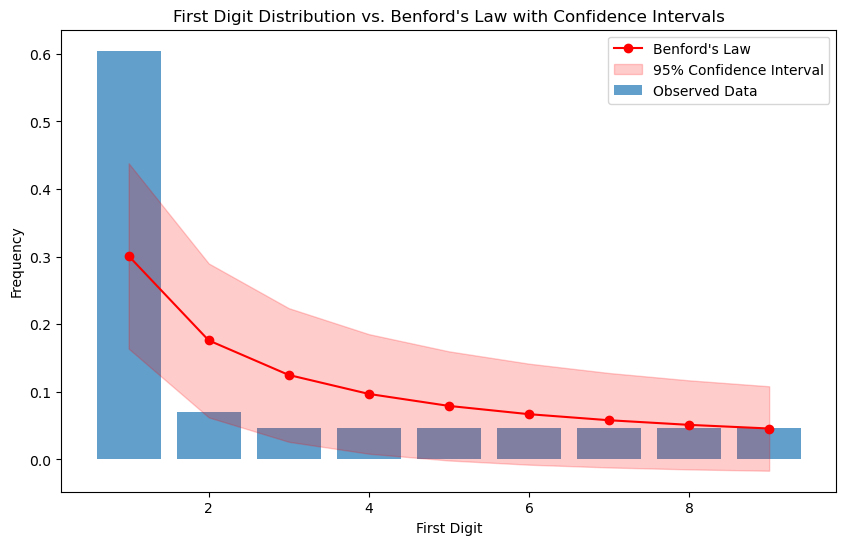

In [123]:
import numpy as np
import matplotlib.pyplot as plt

def benford_distribution(digit):
    '''Calculate the Benford's Law probability for a given digit'''
    return np.log10(1 + 1 / digit)

def calculate_confidence_intervals(observed_counts, total_counts, confidence_level=0.95):
    '''Calculate the confidence intervals for Benford's Law probabilities'''
    z = 1.96  # Z-score for 95% confidence interval
    confidence_intervals = []
    
    for digit in range(1, 10):
        p = benford_distribution(digit)
        observed_proportion = observed_counts[digit] / total_counts
        se = np.sqrt(p * (1 - p) / total_counts)
        margin_of_error = z * se
        lower_bound = p - margin_of_error
        upper_bound = p + margin_of_error
        confidence_intervals.append((lower_bound, upper_bound))
    
    return confidence_intervals

def plot_benford_law_with_intervals(first_digits):
    '''Plot the distribution of first digits against Benford's Law with confidence intervals'''
    counts = np.zeros(10, dtype=int)
    observed_counts = np.bincount(first_digits)
    counts[:len(observed_counts)] = observed_counts
    
    total_counts = sum(counts[1:10])
    frequencies = counts[1:10] / total_counts
    
    benford_probabilities = [benford_distribution(d) for d in range(1, 10)]
    confidence_intervals = calculate_confidence_intervals(counts, total_counts)
    
    lower_bounds = [ci[0] for ci in confidence_intervals]
    upper_bounds = [ci[1] for ci in confidence_intervals]
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, 10), frequencies, alpha=0.7, label='Observed Data')
    plt.plot(range(1, 10), benford_probabilities, 'ro-', label='Benford\'s Law')
    plt.fill_between(range(1, 10), lower_bounds, upper_bounds, color='r', alpha=0.2, label='95% Confidence Interval')
    plt.xlabel('First Digit')
    plt.ylabel('Frequency')
    plt.title('First Digit Distribution vs. Benford\'s Law with Confidence Intervals')
    plt.legend()
    plt.grid(False)
    plt.show()

# Example usage with dummy data
first_digits = [1, 2, 1, 1, 3, 1, 4, 2, 1, 1, 5, 1, 1, 1, 6, 1, 7, 1, 1, 8, 9, 1, 1, 1, 2, 1, 1, 3, 4, 1, 1, 1, 5, 1, 1, 6, 1, 7, 1, 1, 8, 9, 1]
plot_benford_law_with_intervals(first_digits)

### Explanation

1. **Benford Distribution**:
   - The function `benford_distribution(digit)` calculates the expected probability for each digit according to Benford's Law.

2. **Confidence Intervals Calculation**:
   - The function `calculate_confidence_intervals` computes the confidence intervals for the expected proportions using the normal approximation to the binomial distribution.

3. **Plotting**:
   - The function `plot_benford_law_with_intervals` plots the observed frequencies against the expected frequencies according to Benford's Law, along with the calculated confidence intervals.

## Scale Invariance and Benford's Law

**Scale invariance** is a key property that helps explain why Benford's Law is observed in many real-world datasets. Scale invariance means that the statistical properties of the data do not change when the scale of measurement is changed by multiplying the data by a constant factor.

### Understanding Scale Invariance

1. **Definition**:
   - Scale invariance implies that if you multiply all numbers in a dataset by a constant factor, the distribution of the leading digits remains the same. This property is crucial in explaining why Benford's Law applies to a wide range of datasets.

2. **Mathematical Explanation**:
   - Consider a number $ x $ with leading digit $ d $. If you multiply $ x $ by any positive constant $ k $, the leading digit of $ kx $ may change depending on $ k $. However, when considered over a large dataset spanning several orders of magnitude, the distribution of leading digits remains consistent.

### Example of Scale Invariance

1. **Population Data**:
   - Suppose you have population data for several countries, and you multiply all populations by a factor of 10. The first digit distribution of the original and scaled datasets will follow Benford's Law.

2. **Financial Data**:
   - If you have financial data, such as company revenues, and you convert all values from dollars to euros (or any other currency), the leading digit distribution will still conform to Benford's Law, provided the conversion is by a fixed exchange rate.

### Why Scale Invariance Matters

1. **Robustness Across Magnitudes**:
   - Benford's Law applies to datasets that span several orders of magnitude, such as financial figures, demographic data, and scientific measurements. Scale invariance ensures that these datasets retain the same statistical properties regardless of the unit of measurement or scaling factor.

2. **Detecting Anomalies**:
   - The property of scale invariance makes Benford's Law a powerful tool in detecting fraud or anomalies. If a dataset that is expected to follow Benford's Law deviates significantly from it, it could indicate data manipulation or errors.

### Sources and Further Reading

- [NIST: Benford's Law](https://www.nist.gov/)
- [Stanford Encyclopedia of Philosophy: Benford's Law](https://plato.stanford.edu/)
- [Wolfram MathWorld: Benford's Law](https://mathworld.wolfram.com/BenfordsLaw.html)

### Summary

Benford's Law is characterized by scale invariance, meaning the distribution of leading digits remains unchanged under multiplicative scaling. This property ensures that datasets from various domains and magnitudes, when expected to follow Benford's Law, maintain their leading digit distribution even when scaled. Scale invariance is thus a foundational concept that supports the wide applicability of Benford's Law in real-world data analysis and anomaly detection.

### Power Laws and Scale Invariance


### Intuitions and Real-World Examples

1. **Scale Invariance**:
   - Both power laws and Benford's Law are scale-invariant. This means that if you multiply all numbers in a dataset by a constant factor, the statistical properties remain the same. For example, changing the unit of measurement from meters to kilometers does not affect the leading digit distribution predicted by Benford's Law.

2. **Real-World Data**:
   - Many naturally occurring datasets, such as financial figures, populations, and scientific measurements, span several orders of magnitude. These datasets often follow power-law distributions, and as a result, the leading digits of these values conform to Benford's Law.

3. **Multiplicative Processes**:
   - Datasets that grow or shrink multiplicatively (e.g., compound interest, population growth) naturally span several orders of magnitude over time. This multiplicative nature aligns with the properties of power laws and results in the leading digit distribution described by Benford's Law.
   
   
#### Why Power Laws are the Only Scale-Invariant Functions

1. **Definition of Scale Invariance**:
   - A function $ f(x) $ is said to be scale-invariant if scaling the input $ x $ by a constant factor $ k $ results in the function being scaled by some power of $ k $. Mathematically, $ f(x) $ is scale-invariant if for all $ k $:
     $$
     f(kx) = k^a f(x)
     $$
     where $ a $ is a constant.

2. **Derivation**:
   - Assume $ f(x) $ is scale-invariant. Then, for some constant $ C $:
     $$
     f(kx) = C k^a f(x)
     $$
   - To find the form of $ f(x) $, consider the function $ f(x) = x^b $. Then:
     $$
     f(kx) = (kx)^b = k^b x^b = k^b f(x)
     $$
   - Comparing this with $ f(kx) = k^a f(x) $, we get $ a = b $. Thus, the general form of a scale-invariant function is:
     $$
     f(x) = C x^a
     $$

3. **Conclusion**:
   - The only functions that satisfy scale invariance are power-law functions of the form $ f(x) = C x^a $. This property makes power laws unique in describing phenomena where the functional form remains unchanged under scaling transformations.

### Detailed Mathematical Derivation of Benford's Law from Power Law Distribution

To understand how Benford's Law emerges from a power-law distribution, we need to transform the power-law variable using logarithms and then derive the first-digit phenomenon.

#### Power Law Distribution

A power law distribution can be defined as:
$$
P(x) \propto x^{-\alpha}
$$
where $ \alpha $ is a positive constant. This implies that the probability density function (PDF) is:
$$
f_X(x) = C x^{-\alpha}
$$
where $ C $ is a normalization constant.

#### Logarithmic Transformation

Let’s transform the variable $ x $ using the logarithm to base 10:
$$
y = \log_{10}(x)
$$

#### Change of Variables

To find the distribution of $ y $, we use the change of variables formula in probability:
$$
f_Y(y) = f_X(x) \left| \frac{dx}{dy} \right|
$$

Given $ x = 10^y $, we can find:
$$
\frac{dx}{dy} = \frac{d}{dy} (10^y) = 10^y \ln(10)
$$

Substituting into the change of variables formula:
$$
f_Y(y) = f_X(10^y) \left| 10^y \ln(10) \right|
$$

Given $ f_X(x) = C x^{-\alpha} $, we substitute $ x = 10^y $:
$$
f_Y(y) = C (10^y)^{-\alpha} \cdot 10^y \ln(10)
$$

Simplifying, we find:
$$
f_Y(y) = C \ln(10) \cdot 10^{-y\alpha} \cdot 10^y = C \ln(10) \cdot 10^{-y(\alpha - 1)}
$$

#### Uniform Distribution of Logarithms

If $ \alpha $ is close to 1, the term $ 10^{-y(\alpha - 1)} $ becomes approximately 1 over a large range of $ y $. This suggests that $ y $ is uniformly distributed over this range. Therefore, for large ranges of values, the distribution of $ y = \log_{10}(x) $ tends to be uniform.

#### Deriving Benford's Law

Given a uniform distribution over $ y $, consider the probability that the first digit of $ x = 10^y $ is a certain digit $ d $.

For $ x $ to have the first digit $ d $, $ y $ must lie in the interval:
$$
\log_{10}(d) \leq y < \log_{10}(d+1)
$$

Since $ y $ is uniformly distributed, the probability $ P(d) $ that a number $ x $ has the first digit $ d $ is proportional to the length of this interval:
$$
P(d) = \log_{10}(d+1) - \log_{10}(d)
$$

Using properties of logarithms, we simplify this to:
$$
P(d) = \log_{10}\left( \frac{d+1}{d} \right) = \log_{10}\left(1 + \frac{1}{d}\right)
$$

This matches the probability distribution predicted by Benford's Law.



### Review

By taking the logarithm of a power-law-distributed variable, we transform the distribution into one that is approximately uniform in the logarithmic space. This uniformity leads directly to the logarithmic spacing described by Benford's Law, explaining why lower digits appear more frequently as leading digits in many real-world datasets. This relationship between power laws and Benford's Law helps to understand the prevalence of Benford's Law in various domains.

### References

1. [NIST: Benford's Law](https://www.nist.gov/)
2. [Stanford Encyclopedia of Philosophy: Benford's Law](https://plato.stanford.edu/entries/benfords-law/)
3. [Wolfram MathWorld: Benford's Law](https://mathworld.wolfram.com/BenfordsLaw.html)
4. [The American Statistician: The Significant-Digit Phenomenon](https://www.jstor.org/stable/2682902)